In [1]:
import os
import shutil
import zipfile
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
# Descomprime la base de datos

local_zip = "C:/Users/ferga/Documents/Python/hojas/WeedCountImages_v1.zip"

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('')
zip_ref.close()

In [2]:
# Cuenta el número de imágenes que hay por cada categoría

imag_1_hoja = 0
imag_2_hojas = 0
imag_3_hojas = 0
imag_4_hojas = 0
imag_5_hojas = 0
imag_6_hojas = 0
imag_7_hojas = 0
imag_8_hojas = 0
imag_9_hojas = 0
dir1 = "C:/Users/ferga/Documents/Python/hojas/1"
dir2 = "C:/Users/ferga/Documents/Python/hojas/2"
dir3 = "C:/Users/ferga/Documents/Python/hojas/3"
dir4 = "C:/Users/ferga/Documents/Python/hojas/4"
dir5 = "C:/Users/ferga/Documents/Python/hojas/5"
dir6 = "C:/Users/ferga/Documents/Python/hojas/6"
dir7 = "C:/Users/ferga/Documents/Python/hojas/7"
dir8 = "C:/Users/ferga/Documents/Python/hojas/8"
dir9 = "C:/Users/ferga/Documents/Python/hojas/9+"
for path in os.listdir(dir1):
    if os.path.isfile(os.path.join(dir1, path)):
        imag_1_hoja += 1
for path in os.listdir(dir2):
    if os.path.isfile(os.path.join(dir2, path)):
        imag_2_hojas += 1
for path in os.listdir(dir3):
    if os.path.isfile(os.path.join(dir3, path)):
        imag_3_hojas += 1
for path in os.listdir(dir4):
    if os.path.isfile(os.path.join(dir4, path)):
        imag_4_hojas += 1
for path in os.listdir(dir5):
    if os.path.isfile(os.path.join(dir5, path)):
        imag_5_hojas += 1
for path in os.listdir(dir6):
    if os.path.isfile(os.path.join(dir6, path)):
        imag_6_hojas += 1
for path in os.listdir(dir7):
    if os.path.isfile(os.path.join(dir7, path)):
        imag_7_hojas += 1
for path in os.listdir(dir8):
    if os.path.isfile(os.path.join(dir8, path)):
        imag_8_hojas += 1
for path in os.listdir(dir9):
    if os.path.isfile(os.path.join(dir9, path)):
        imag_9_hojas += 1
print('Imagenes de 1 hoja: '+ str(imag_1_hoja))
print('Imagenes de 2 hojas: '+ str(imag_2_hojas))
print('Imagenes de 3 hojas: '+ str(imag_3_hojas))
print('Imagenes de 4 hojas: '+ str(imag_4_hojas))
print('Imagenes de 5 hojas: '+ str(imag_5_hojas))
print('Imagenes de 6 hojas: '+ str(imag_6_hojas))
print('Imagenes de 7 hojas: '+ str(imag_7_hojas))
print('Imagenes de 8 hojas: '+ str(imag_8_hojas))
print('Imagenes de 9 hojas: '+ str(imag_9_hojas))
print('Total: ', imag_1_hoja+imag_2_hojas+imag_3_hojas+imag_4_hojas+imag_5_hojas+imag_6_hojas+imag_7_hojas+imag_8_hojas+imag_9_hojas)


Imagenes de 1 hoja: 617
Imagenes de 2 hojas: 3063
Imagenes de 3 hojas: 615
Imagenes de 4 hojas: 786
Imagenes de 5 hojas: 467
Imagenes de 6 hojas: 502
Imagenes de 7 hojas: 169
Imagenes de 8 hojas: 160
Imagenes de 9 hojas: 494
Total:  6873


In [3]:
# Numero a trabajar de imagenes
imag_1_hoja = 615
imag_2_hojas = 615
imag_3_hojas = 615
imag_4_hojas = 615

In [4]:
#Cuenta cuantas imágenes servirán para train, para validation y para test, en este caso se ha seguido el criterio 80%-10%-10% respectivamente.

n_imag_train_1 = round(imag_1_hoja*0.8)
n_imag_validation_1 = imag_1_hoja//10
n_imag_test_1 = imag_1_hoja-n_imag_train_1-n_imag_validation_1
print('1 hoja: Train=' + str(n_imag_train_1) + ' Validation=' + str(n_imag_validation_1) + ' Test=' + str(n_imag_test_1))
n_imag_train_2 = round(imag_2_hojas*0.8)
n_imag_validation_2 = imag_2_hojas//10
n_imag_test_2 = imag_2_hojas-n_imag_train_2-n_imag_validation_2
print('2 hojas: Train=' + str(n_imag_train_2) + ' Validation=' + str(n_imag_validation_2) + ' Test=' + str(n_imag_test_2))
n_imag_train_3 = round(imag_3_hojas*0.8)
n_imag_validation_3 = imag_3_hojas//10
n_imag_test_3 = imag_3_hojas-n_imag_train_3-n_imag_validation_3
print('3 hojas: Train=' + str(n_imag_train_3) + ' Validation=' + str(n_imag_validation_3) + ' Test=' + str(n_imag_test_3))
n_imag_train_4 = round(imag_4_hojas*0.8)
n_imag_validation_4 = imag_4_hojas//10
n_imag_test_4 = imag_4_hojas-n_imag_train_4-n_imag_validation_4
print('4 hojas: Train=' + str(n_imag_train_4) + ' Validation=' + str(n_imag_validation_4) + ' Test=' + str(n_imag_test_4))


1 hoja: Train=492 Validation=61 Test=62
2 hojas: Train=492 Validation=61 Test=62
3 hojas: Train=492 Validation=61 Test=62
4 hojas: Train=492 Validation=61 Test=62


In [5]:
#Asignamos cada ruta a variables que luego serán necesarias.

base_dir = "C:/Users/ferga/Documents/Python/hojas"

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

## Directorio con las imagenes de train
# 1 hoja.
train_weed1_dir = os.path.join(train_dir, '1')
# 2 hojas.
train_weed2_dir = os.path.join(train_dir, '2')
# 3 hojas.
train_weed3_dir = os.path.join(train_dir, '3')
# 4 hojas.
train_weed4_dir = os.path.join(train_dir, '4')

## Directorio con las imagenes de validation
# 1 hoja
validation_weed1_dir = os.path.join(validation_dir, '1')
# 2 hojas
validation_weed2_dir = os.path.join(validation_dir, '2')
# 3 hojas.
validation_weed3_dir = os.path.join(validation_dir, '3')
# 4 hojas.
validation_weed4_dir = os.path.join(validation_dir, '4')


## Directorio con las imagenes de test
# 1 hoja
test_weed1_dir = os.path.join(test_dir,'1')
# 2 hojas
test_weed2_dir = os.path.join(test_dir,'2')
# 3 hojas
test_weed3_dir = os.path.join(test_dir,'3')
# 4 hojas
test_weed4_dir = os.path.join(test_dir,'4')


In [6]:
# Ordena cada foto en su respectiva carpeta de train, test o validation

# 1
i=0
while len(os.listdir(train_weed1_dir ) ) < n_imag_train_1:
    if os.path.isfile('hojas/1/'+str(i)+'.png'):
        shutil.copy('hojas/1/'+ str(i) +'.png','hojas/train/1/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(validation_weed1_dir ) ) < n_imag_validation_1:
    if os.path.isfile('hojas/1/'+str(i)+'.png'):
        shutil.copy('hojas/1/'+ str(i) +'.png','hojas/validation/1/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(test_weed1_dir ) ) < n_imag_test_1:
    if os.path.isfile('hojas/1/'+str(i)+'.png'):
        shutil.copy('hojas/1/'+ str(i) +'.png','hojas/test/1/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
# 2
i=0
while len(os.listdir(train_weed2_dir ) ) < n_imag_train_2:
    if os.path.isfile('hojas/2/'+str(i)+'.png'):
        shutil.copy('hojas/2/'+ str(i) +'.png','hojas/train/2/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(validation_weed2_dir ) ) < n_imag_validation_2:
    if os.path.isfile('hojas/2/'+str(i)+'.png'):
        shutil.copy('hojas/2/'+ str(i) +'.png','hojas/validation/2/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(test_weed2_dir ) ) < n_imag_test_2:
    if os.path.isfile('hojas/2/'+str(i)+'.png'):
        shutil.copy('hojas/2/'+ str(i) +'.png','hojas/test/2/'+ str(i)+'.png')
        i+=1
    else:
        i+=1

# 3
i=0
while len(os.listdir(train_weed3_dir ) ) < n_imag_train_3:
    if os.path.isfile('hojas/3/'+str(i)+'.png'):
        shutil.copy('hojas/3/'+ str(i) +'.png','hojas/train/3/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(validation_weed3_dir ) ) < n_imag_validation_3:
    if os.path.isfile('hojas/3/'+str(i)+'.png'):
        shutil.copy('hojas/3/'+ str(i) +'.png','hojas/validation/3/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(test_weed3_dir ) ) < n_imag_test_3:
    if os.path.isfile('hojas/3/'+str(i)+'.png'):
        shutil.copy('hojas/3/'+ str(i) +'.png','hojas/test/3/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
# 4
i=0
while len(os.listdir(train_weed4_dir ) ) < n_imag_train_4:
    if os.path.isfile('hojas/4/'+str(i)+'.png'):
        shutil.copy('hojas/4/'+ str(i) +'.png','hojas/train/4/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(validation_weed4_dir ) ) < n_imag_validation_4:
    if os.path.isfile('hojas/4/'+str(i)+'.png'):
        shutil.copy('hojas/4/'+ str(i) +'.png','hojas/validation/4/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(test_weed4_dir ) ) < n_imag_test_4:
    if os.path.isfile('hojas/4/'+str(i)+'.png'):
        shutil.copy('hojas/4/'+ str(i) +'.png','hojas/test/4/'+ str(i)+'.png')
        i+=1
    else:
        i+=1        

In [7]:
# Pequeña comprobación de que las fotos están bien ordenadas

#Train
train_weed1_fnames = os.listdir( train_weed1_dir )
print(train_weed1_fnames[:5])
train_weed2_fnames = os.listdir( train_weed2_dir )
print(train_weed2_fnames[:5])
train_weed3_fnames = os.listdir( train_weed3_dir )
print(train_weed3_fnames[:5])
train_weed4_fnames = os.listdir( train_weed4_dir )
print(train_weed4_fnames[:5])

#Validation

#Test

['0.png', '1.png', '10.png', '100.png', '102.png']
['1.png', '10.png', '102.png', '103.png', '105.png']
['1.png', '10.png', '100.png', '101.png', '102.png']
['1.png', '10.png', '1002.png', '1005.png', '1006.png']


In [8]:
#Comprueba el numero de fotos que hay en cada directorio para verificar que se ha realizado el reparto correctamente

print('total training weed1 images :', len(os.listdir(train_weed1_dir ) ))
print('total training weed2 images :', len(os.listdir(train_weed2_dir ) ))
print('total training weed3 images :', len(os.listdir(train_weed3_dir ) ))
print('total training weed4 images :', len(os.listdir(train_weed4_dir ) ))

print('total validation weed1 images :', len(os.listdir( validation_weed1_dir ) ))
print('total validation weed2 images :', len(os.listdir( validation_weed2_dir ) ))
print('total validation weed3 images :', len(os.listdir( validation_weed3_dir ) ))
print('total validation weed4 images :', len(os.listdir( validation_weed4_dir ) ))

print('total test weed1 images :', len(os.listdir( test_weed1_dir ) ))
print('total test weed2 images :', len(os.listdir( test_weed2_dir ) ))
print('total test weed3 images :', len(os.listdir( test_weed3_dir ) ))
print('total test weed4 images :', len(os.listdir( test_weed4_dir ) ))

total training weed1 images : 492
total training weed2 images : 492
total training weed3 images : 492
total training weed4 images : 492
total validation weed1 images : 61
total validation weed2 images : 61
total validation weed3 images : 61
total validation weed4 images : 61
total test weed1 images : 62
total test weed2 images : 62
total test weed3 images : 62
total test weed4 images : 62


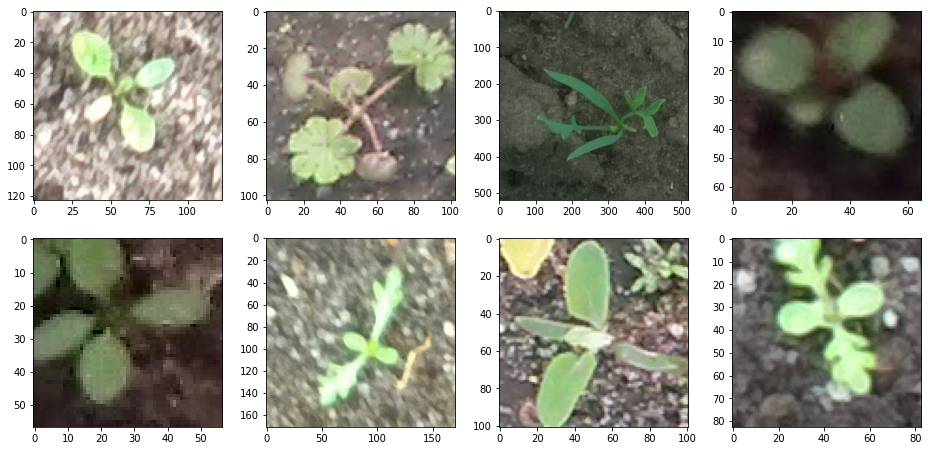

In [9]:
# Representa un ejemplo de las imágenes que se van a tomar para resolver el problema. En este caso se representarán las de dos hojas

# presentaremos images en una configuración de 4x4
nrows = 4
ncols = 4

pic_index = 0 # Índice para iterar sobre las imagenes

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_weed_pix = [os.path.join(train_weed4_dir, fname) 
                for fname in train_weed4_fnames[ pic_index-8:pic_index] 
               ]

for i, img_path in enumerate(next_weed_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  
plt.show()

In [21]:
#Creación de la CNN

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 15, 256)      

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(
      rescale=1.0/255.,
      rotation_range=60,
      horizontal_flip=True,
      fill_mode='nearest')
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [11]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

Found 1968 images belonging to 4 classes.
Found 244 images belonging to 4 classes.
Found 248 images belonging to 4 classes.


In [12]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

98
12


In [28]:
history = model.fit(
    train_generator, 
    steps_per_epoch= steps_per_epoch,
    epochs=150,
    validation_data=validation_generator,
    validation_steps= validation_steps,
    verbose=1)

Epoch 1/150
98/98 [==============================] - 23s 226ms/step - loss: 1.3846 - accuracy: 0.2474 - val_loss: 1.3833 - val_accuracy: 0.2500
Epoch 2/150
98/98 [==============================] - 22s 220ms/step - loss: 1.3806 - accuracy: 0.2757 - val_loss: 1.3803 - val_accuracy: 0.2667
Epoch 3/150
98/98 [==============================] - 29s 294ms/step - loss: 1.3765 - accuracy: 0.2844 - val_loss: 1.3765 - val_accuracy: 0.2750
Epoch 4/150
98/98 [==============================] - 41s 415ms/step - loss: 1.3677 - accuracy: 0.3157 - val_loss: 1.3704 - val_accuracy: 0.2833
Epoch 5/150
98/98 [==============================] - 34s 342ms/step - loss: 1.3520 - accuracy: 0.3414 - val_loss: 1.3530 - val_accuracy: 0.3792
Epoch 6/150
98/98 [==============================] - 32s 329ms/step - loss: 1.3328 - accuracy: 0.3778 - val_loss: 1.3340 - val_accuracy: 0.3458
Epoch 7/150
98/98 [==============================] - 33s 338ms/step - loss: 1.3217 - accuracy: 0.3670 - val_loss: 1.3163 - val_accuracy:

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

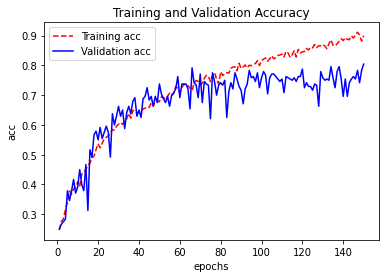

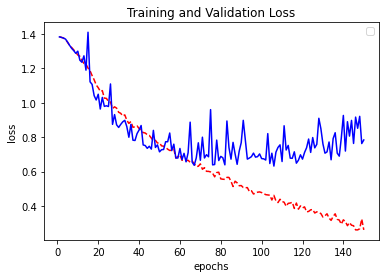

<Figure size 432x288 with 0 Axes>

In [29]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs del eje X

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and Validation Loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [14]:
test_lost, test_acc= model.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

13/13 [==============================] - 5s 99ms/step - loss: 0.7651 - accuracy: 0.7702
Test Accuracy: 0.7701612710952759


In [ ]:
# Guardar modelo
model.save('CH_V_4hojas.h5')

In [13]:
# Cargar modelo entrenado
model = tf.keras.models.load_model('CH_V_4hojas.h5')

[0. 1. 0. 0.]


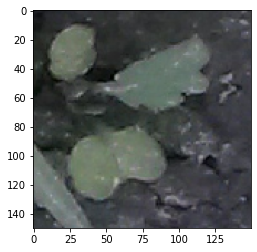

2 hojas


In [17]:
# predicting images

path='hojas/test/3/914.png'
img=image.load_img(path, target_size=(150, 150))
  
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
  
classes = model.predict(images, batch_size=10)
  
print(classes[0])
  
plt.imshow(img)  
plt.show()

if classes[0,0] == 1:
    print("1 hoja")
if classes[0,1] == 1:
    print("2 hojas")
if classes[0,2] == 1:
    print("3 hojas")
if classes[0,3] == 1:
    print("4 hojas")
